In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="ticks")

In [2]:
df = pd.read_pickle("../data/data_train.pkl")

In [3]:
df.head()

f107  delta_h1  delta_h2  delta_h3     mh1     mh2     mh3  \
index_datetime                                                                
2000-01-16      201.0    20.339    47.621    43.580  286.03  333.66  377.24   
2000-02-10      171.1    22.393    59.496    46.489  291.32  350.81  397.30   
2000-02-11      165.8    16.126    61.696    45.444  289.19  350.89  396.33   
2000-02-12      159.1    26.422    44.049    31.846  286.16  330.21  362.06   
2000-02-16      156.3    23.000    53.724    33.972  293.36  347.09  381.06   

                   av1     av2     av3     mv1     mv2     mv3  discretize_s4  
index_datetime                                                                 
2000-01-16      11.440  26.908  45.428  16.497  39.293  48.158            0.0  
2000-02-10      13.327  32.924  50.410  20.987  37.294  61.565            0.0  
2000-02-11      10.148  34.579  49.808  28.723  44.724  53.602            0.0  
2000-02-12      14.805  24.866  34.917  22.713  30.998  38.019            0.0  
2000-02-16      13.633  29.586  38.118  22.363  34.212  42.570            0.0

In [4]:
sns.pairplot(df, hue="discretize_s4")

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [5]:
X = df[['f107', 'delta_h1', 'delta_h2', 'delta_h3',
        'mh1', 'mh2', 'mh3', 'av1', 'av2', 'av3', 'mv1', 'mv2', 'mv3']].values

X_scaler = StandardScaler() # transformation for X
X_scaler.fit(X)
X = X_scaler.transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)  

[0.78420894 0.1170576 ]
[111.70645735  43.15808718]


In [8]:
df_pca = pd.DataFrame(data=X_pca, columns=['pc1', 'pc2'])
df_pca['discretize_s4'] = df['discretize_s4'].values

In [9]:
df_pca.head()

pc1       pc2  discretize_s4
0  1.474266 -1.967301            0.0
1  2.295682 -2.150077            0.0
2  2.299771 -1.900458            0.0
3  0.900064 -0.689443            0.0
4  1.413135 -0.911301            0.0

In [10]:
sns.pairplot(df_pca, hue="discretize_s4")

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [11]:
ax = sns.scatterplot(x="pc1", y="pc2", hue="discretize_s4", data=df_pca)

In [12]:
X_train = X[0:1223]
X_test = X[1223:1275]

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


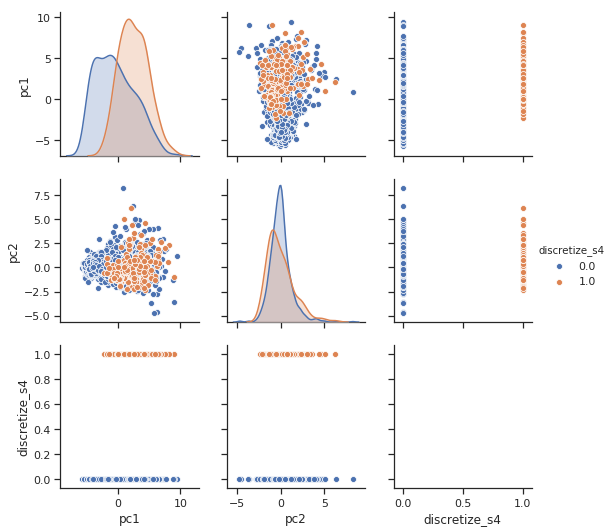

In [13]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)

df_pca = pd.DataFrame(data=X_pca, columns=['pc1', 'pc2'])
df_pca['discretize_s4'] = df['discretize_s4'].values

sns.pairplot(df_pca, hue="discretize_s4")

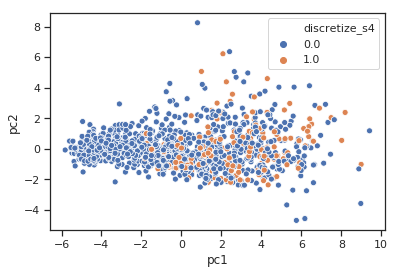

In [14]:
sns.scatterplot(x="pc1", y="pc2", hue="discretize_s4", data=df_pca)

In [15]:
from rbm.tfrbm import GBRBM, BBRBM

ModuleNotFoundError: No module named 'rbm'

In [ ]:
rbm = GBRBM(n_visible=13, n_hidden=2, learning_rate=0.01, momentum=0.95)
rbm.fit(X_train, n_epoches=30, batch_size=10, verbose=False)

hidden_train = rbm.transform(X_train)
visible_train = rbm.transform_inv(hidden_train)
error_train = 0.0
for real_value, predict_value in zip(X_train, visible_train):
    error_train += np.linalg.norm(real_value - predict_value)
    
error_train /= X_train.shape[0]

hidden_test = rbm.transform(X_test)
visible_test = rbm.transform_inv(hidden_test)
error_test = 0.0
for real_value, predict_value in zip(X_test, visible_test):
    error_test += np.linalg.norm(real_value - predict_value)
    
error_test /= X_test.shape[0]

print(error_train, error_test)

df_rbm = pd.DataFrame(data=hidden_test, columns=['c1', 'c2'])
df_rbm['discretize_s4'] = df['discretize_s4'][1223:1275].values

sns.pairplot(df_rbm, hue="discretize_s4")

In [ ]:
sns.scatterplot(x="c1", y="c2", hue="discretize_s4", data=df_rbm)

In [ ]:
rbm = GBRBM(n_visible=13, n_hidden=13, learning_rate=0.01, momentum=0.95)
rbm.fit(X_train, n_epoches=30, batch_size=10, verbose=False)

hidden_train = rbm.transform(X_train)
visible_train = rbm.transform_inv(hidden_train)
error_train = 0.0
for real_value, predict_value in zip(X_train, visible_train):
    error_train += np.linalg.norm(real_value - predict_value)
    
error_train /= X_train.shape[0]

hidden_test = rbm.transform(X_test)
visible_test = rbm.transform_inv(hidden_test)
error_test = 0.0
for real_value, predict_value in zip(X_test, visible_test):
    error_test += np.linalg.norm(real_value - predict_value)
    
error_test /= X_test.shape[0]

print(error_train, error_test)

df_rbm = pd.DataFrame(data=hidden_test)
df_rbm['discretize_s4'] = df['discretize_s4'][1223:1275].values